# Population

## 1. 배경
- 목표
    1. 인구 소멸 위기 지역 파익
    2. 인구 소멸 위기 지역의 지도 표현
    3. 지도 표현에 대한 카르토그램 표현

## 2. 데이터 읽고 인구 소멸 지역 계산하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import set_matplotlib_hangul
import warnings

warnings.filterwarnings(action="ignore")
%matplotlib inline

Hangul set complete in your Windows!


## fillna() 공부

In [2]:
datas = {
    "A": np.random.randint(1,45,8),
    "B": np.random.randint(1,45,8),
    "C": np.random.randint(1,45,8),
}

datas

{'A': array([20, 26, 43,  7, 14, 30, 11,  2]),
 'B': array([18, 10,  1, 19, 39,  9, 19, 23]),
 'C': array([ 8,  8, 25, 18, 22, 26, 34, 18])}

In [3]:
fillna_df = pd.DataFrame(datas)
fillna_df

,A,B,C
0,20,18,8
1,26,10,8
2,43,1,25
3,7,19,18
4,14,39,22
5,30,9,26
6,11,19,34
7,2,23,18


In [4]:
fillna_df.loc[2:4, ["A"]] = np.nan
fillna_df.loc[3:5, ["B"]] = np.nan
fillna_df.loc[4:7, ["C"]] = np.nan
fillna_df

,A,B,C
0,20.0,18.0,8.0
1,26.0,10.0,8.0
2,NaN,1.0,25.0
3,NaN,NaN,18.0
4,NaN,NaN,NaN
5,30.0,NaN,NaN
6,11.0,19.0,NaN
7,2.0,23.0,NaN


In [5]:
fillna_df.fillna(method="pad") # 이전의 데이터로 채워줌, ==ffill

,A,B,C
0,20.0,18.0,8.0
1,26.0,10.0,8.0
2,26.0,1.0,25.0
3,26.0,1.0,18.0
4,26.0,1.0,18.0
5,30.0,1.0,18.0
6,11.0,19.0,18.0
7,2.0,23.0,18.0


In [6]:
fillna_df.fillna(method="pad",axis=1) # 이전의 데이터로 채워줌, ==ffill, 가로로 채우기도 가능

,A,B,C
0,20.0,18.0,8.0
1,26.0,10.0,8.0
2,NaN,1.0,25.0
3,NaN,NaN,18.0
4,NaN,NaN,NaN
5,30.0,30.0,30.0
6,11.0,19.0,19.0
7,2.0,23.0,23.0


In [7]:
fillna_df.fillna(method="backfill") # 뒤에 있던 데이터로 채워줌, == bfill

,A,B,C
0,20.0,18.0,8.0
1,26.0,10.0,8.0
2,30.0,1.0,25.0
3,30.0,19.0,18.0
4,30.0,19.0,NaN
5,30.0,19.0,NaN
6,11.0,19.0,NaN
7,2.0,23.0,NaN


# 인구수 엑셀 정리

In [9]:
population = pd.read_excel("../data/07/07_population_raw_data.xlsx", header=1)
population.fillna(method="pad",inplace=True)
population

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,전국,소계,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,전국,소계,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,서울특별시,소계,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,제주특별자치도,제주시,남자인구수 (명),235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0
842,제주특별자치도,제주시,여자인구수 (명),234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0
843,제주특별자치도,서귀포시,총인구수 (명),170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0
844,제주특별자치도,서귀포시,남자인구수 (명),86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0


In [10]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   행정구역(동읍면)별(1)  846 non-null    object 
 1   행정구역(동읍면)별(2)  846 non-null    object 
 2   항목             846 non-null    object 
 3   계              846 non-null    float64
 4   20 - 24세       846 non-null    float64
 5   25 - 29세       846 non-null    float64
 6   30 - 34세       846 non-null    int64  
 7   35 - 39세       846 non-null    float64
 8   65 - 69세       846 non-null    float64
 9   70 - 74세       846 non-null    float64
 10  75 - 79세       846 non-null    int64  
 11  80 - 84세       846 non-null    float64
 12  85 - 89세       846 non-null    float64
 13  90 - 94세       846 non-null    float64
 14  95 - 99세       846 non-null    int64  
 15  100+           846 non-null    float64
dtypes: float64(10), int64(3), object(3)
memory usage: 105.9+ KB


In [11]:
population.rename(
    columns={
        "행정구역(동읍면)별(1)" : "광역시도",
        "행정구역(동읍면)별(2)" : "시도",
        "계" : "인구수"
    }, inplace=True
)

population.head()

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,전국,소계,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,전국,소계,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,서울특별시,소계,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


In [12]:
## 소계 제거

population = population[population["시도"] != "소계"]
population.head()

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [13]:
population.is_copy = False

population.rename(
    columns={"항목":"구분"}, inplace=True
)

population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [14]:
population.loc[population["구분"] == "총인구수 (명)", "구분"] = "합계"
population.loc[population["구분"] == "남자인구수 (명)", "구분"] = "남자"
population.loc[population["구분"] == "여자인구수 (명)", "구분"] = "여자"

In [15]:
population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [16]:
## 소멸지역을 조사하기 위한 데이터

population["20-39세"] = (
    population["20 - 24세"] + 
    population["25 - 29세"] + 
    population["30 - 34세"] + 
    population["35 - 39세"]
)


population["65세이상"] = (
    population["65 - 69세"] + 
    population["70 - 74세"] + 
    population["75 - 79세"] +
    population["80 - 84세"] + 
    population["85 - 89세"] +
    population["90 - 94세"] +
    population["95 - 99세"] +
    population["100+"]
)

In [17]:
population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0


In [18]:
## pivot_table, no values


pop_ex = pd.pivot_table(
    data=population,
    index=["광역시도","시도"],
    columns=["구분"],
    #values=["인구수","20-39세","65세이상"]
)
pop_ex

100+               20 - 24세                      20-39세            \
구분          남자     여자     합계       남자       여자       합계        남자        여자   
광역시도 시도                                                                       
강원도  강릉시  20.0   57.0   77.0   8004.0   6532.0  14536.0   26286.0   23098.0   
     고성군   2.0    8.0   10.0   1781.0    821.0   2602.0    4494.0    2529.0   
     동해시   8.0   19.0   27.0   3280.0   2397.0   5677.0   11511.0    9753.0   
     삼척시  11.0   28.0   39.0   3073.0   2645.0   5718.0    8708.0    7115.0   
     속초시  10.0   16.0   26.0   2800.0   2240.0   5040.0    9956.0    8752.0   
...        ...    ...    ...      ...      ...      ...       ...       ...   
충청북도 진천군   5.0   13.0   18.0   2223.0   1771.0   3994.0    9391.0    7622.0   
     청원구  15.0   25.0   40.0   6673.0   5689.0  12362.0   32216.0   27805.0   
     청주시  44.0  118.0  162.0  33439.0  28471.0  61910.0  128318.0  115719.0   
     충주시  13.0   50.0   63.0   7587.0   6044.0  13631.0   26600.0   22757.0   
     흥덕구   7.0   28.0   35.0  10421.0   9281.0  19702.0   40933.0   37675.0   

                   25 - 29세  ... 85 - 89세 90 - 94세                 95 - 99세  \
구분              합계       남자  ...       합계       남자      여자      합계       남자   
광역시도 시도                      ...                                              
강원도  강릉시   49384.0   5685.0  ...   2459.0    204.0   771.0   975.0       49   
     고성군    7023.0   1271.0  ...    517.0     59.0   161.0   220.0       10   
     동해시   21264.0   2226.0  ...    904.0     57.0   245.0   302.0       13   
     삼척시   15823.0   1765.0  ...   1018.0     71.0   290.0   361.0       10   
     속초시   18708.0   2180.0  ...    902.0     95.0   241.0   336.0       23   
...            ...      ...  ...      ...      ...     ...     ...      ...   
충청북도 진천군   17013.0   1917.0  ...    760.0     42.0   200.0   242.0       13   
     청원구   60021.0   7117.0  ...   1267.0     80.0   294.0   374.0       12   
     청주시  244037.0  29540.0  ...   5707.0    407.0  1491.0  1898.0       77   
     충주시   49357.0   6032.0  ...   2113.0    212.0   507.0   719.0       31   
     흥덕구   78608.0   9993.0  ...   1417.0    109.0   370.0   479.0       23   

                         인구수                      
구분         여자   합계        남자        여자        합계  
광역시도 시도                                           
강원도  강릉시  181  230  106231.0  107615.0  213846.0  
     고성군   47   57   15899.0   14215.0   30114.0  
     동해시   53   66   47166.0   46131.0   93297.0  
     삼척시   50   60   35253.0   34346.0   69599.0  
     속초시   35   58   40288.0   41505.0   81793.0  
...       ...  ...       ...       ...       ...  
충청북도 진천군   37   50   36387.0   33563.0   69950.0  
     청원구   89  101   97006.0   93807.0  190813.0  
     청주시  379  456  419323.0  415874.0  835197.0  
     충주시  135  166  104877.0  103473.0  208350.0  
     흥덕구   91  114  127647.0  125916.0  253563.0  

[264 rows x 45 columns]

In [19]:
## pivot_table

pop = pd.pivot_table(
    data=population,
    index=["광역시도","시도"],
    columns=["구분"],
    values=["인구수","20-39세","65세이상"] 
    ## index, columns, values 가 모두 지정된거면 데이터가 겹칠 일이없다.
    ## index 만하게 된다면 다머지 인덱스를 기준으로 정렬이니 인덱스 이름이 겹치는 값들은 전부 합쳐짐(기본값은 평균임)
)
pop

20-39세                        65세이상                         인구수  \
구분              남자        여자        합계       남자       여자       합계        남자   
광역시도 시도                                                                       
강원도  강릉시   26286.0   23098.0   49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군    4494.0    2529.0    7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시   11511.0    9753.0   21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시    8708.0    7115.0   15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시    9956.0    8752.0   18708.0   5139.0   7613.0  12752.0   40288.0   
...            ...       ...       ...      ...      ...      ...       ...   
충청북도 진천군    9391.0    7622.0   17013.0   4731.0   6575.0  11306.0   36387.0   
     청원구   32216.0   27805.0   60021.0   8417.0  11914.0  20331.0   97006.0   
     청주시  128318.0  115719.0  244037.0  37882.0  53671.0  91553.0  419323.0   
     충주시   26600.0   22757.0   49357.0  14407.0  20383.0  34790.0  104877.0   
     흥덕구   40933.0   37675.0   78608.0   9788.0  13671.0  23459.0  127647.0   

                              
구분              여자        합계  
광역시도 시도                       
강원도  강릉시  107615.0  213846.0  
     고성군   14215.0   30114.0  
     동해시   46131.0   93297.0  
     삼척시   34346.0   69599.0  
     속초시   41505.0   81793.0  
...            ...       ...  
충청북도 진천군   33563.0   69950.0  
     청원구   93807.0  190813.0  
     청주시  415874.0  835197.0  
     충주시  103473.0  208350.0  
     흥덕구  125916.0  253563.0  

[264 rows x 9 columns]

In [20]:
pop["20-39세", "여자"] ## 멀티 컬럼

광역시도  시도 
강원도   강릉시     23098.0
      고성군      2529.0
      동해시      9753.0
      삼척시      7115.0
      속초시      8752.0
               ...   
충청북도  진천군      7622.0
      청원구     27805.0
      청주시    115719.0
      충주시     22757.0
      흥덕구     37675.0
Name: (20-39세, 여자), Length: 264, dtype: float64

In [21]:
# 소멸 비율 계산, 고령자 대비 가임기 여성이 많은지 적은지

pop["소멸비율"] = pop["20-39세", "여자"] / (pop["65세이상","합계"] / 2)
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시도                                 
강원도  강릉시  107615.0  213846.0  1.226041  
     고성군   14215.0   30114.0  0.707314  
     동해시   46131.0   93297.0  1.289738  
     삼척시   34346.0   69599.0  0.973990  
     속초시   41505.0   81793.0  1.372647

In [22]:
## 소멸 위기 지역 컬럼 생성
# 소멸비율이 1이상이면 소멸 위기가 아니다 : False
# 소멸비율이 1보다 작으면 소멸 위기다 : True


pop["소멸위기지역"] = pop["소멸비율"] < 1.0
pop

20-39세                        65세이상                         인구수  \
구분              남자        여자        합계       남자       여자       합계        남자   
광역시도 시도                                                                       
강원도  강릉시   26286.0   23098.0   49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군    4494.0    2529.0    7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시   11511.0    9753.0   21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시    8708.0    7115.0   15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시    9956.0    8752.0   18708.0   5139.0   7613.0  12752.0   40288.0   
...            ...       ...       ...      ...      ...      ...       ...   
충청북도 진천군    9391.0    7622.0   17013.0   4731.0   6575.0  11306.0   36387.0   
     청원구   32216.0   27805.0   60021.0   8417.0  11914.0  20331.0   97006.0   
     청주시  128318.0  115719.0  244037.0  37882.0  53671.0  91553.0  419323.0   
     충주시   26600.0   22757.0   49357.0  14407.0  20383.0  34790.0  104877.0   
     흥덕구   40933.0   37675.0   78608.0   9788.0  13671.0  23459.0  127647.0   

                                  소멸비율 소멸위기지역  
구분              여자        합계                   
광역시도 시도                                        
강원도  강릉시  107615.0  213846.0  1.226041  False  
     고성군   14215.0   30114.0  0.707314   True  
     동해시   46131.0   93297.0  1.289738  False  
     삼척시   34346.0   69599.0  0.973990   True  
     속초시   41505.0   81793.0  1.372647  False  
...            ...       ...       ...    ...  
충청북도 진천군   33563.0   69950.0  1.348311  False  
     청원구   93807.0  190813.0  2.735232  False  
     청주시  415874.0  835197.0  2.527913  False  
     충주시  103473.0  208350.0  1.308249  False  
     흥덕구  125916.0  253563.0  3.211987  False  

[264 rows x 11 columns]

In [27]:
## 소멸위기 지역 조회

pop[pop["소멸위기지역"] == True].index.get_level_values(1) 
# get_level_values : 멀티인덱스 이기 때문에 0,1 이 존재 그 중 시도 인덱스로 불러오기

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

In [28]:
# 멀티 인덱스를 해제
pop.reset_index(inplace=True)
pop.head()

광역시도   시도   20-39세                      65세이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
1   강원도  고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
2   강원도  동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
3   강원도  삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
4   강원도  속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                            소멸비율 소멸위기지역  
구분        여자        합계                   
0   107615.0  213846.0  1.226041  False  
1    14215.0   30114.0  0.707314   True  
2    46131.0   93297.0  1.289738  False  
3    34346.0   69599.0  0.973990   True  
4    41505.0   81793.0  1.372647  False

In [29]:
## 멀티컬럼 이름을 더해주기

In [32]:
## 멀티컬럼 이름을 더해주기 : 리스트 컴프리헨션 방법 사용
# 결과 ==>  멀티컬럼 레벨0의 n 번째 이름 + 멀티컬럼 레벨1의 n 번째 이름

tmp_columns = [
    pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n]
    for n in range(0, len(pop.columns.get_level_values(0))) 
]

print(tmp_columns)

['광역시도',
 '시도',
 '20-39세남자',
 '20-39세여자',
 '20-39세합계',
 '65세이상남자',
 '65세이상여자',
 '65세이상합계',
 '인구수남자',
 '인구수여자',
 '인구수합계',
 '소멸비율',
 '소멸위기지역']

In [33]:
pop.columns = tmp_columns
pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


#### 3. 지도 시각화를 위한 지역 ID 만들기

In [34]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      264 non-null    object 
 1   시도        264 non-null    object 
 2   20-39세남자  264 non-null    float64
 3   20-39세여자  264 non-null    float64
 4   20-39세합계  264 non-null    float64
 5   65세이상남자   264 non-null    float64
 6   65세이상여자   264 non-null    float64
 7   65세이상합계   264 non-null    float64
 8   인구수남자     264 non-null    float64
 9   인구수여자     264 non-null    float64
 10  인구수합계     264 non-null    float64
 11  소멸비율      264 non-null    float64
 12  소멸위기지역    264 non-null    bool   
dtypes: bool(1), float64(10), object(2)
memory usage: 25.1+ KB


In [35]:
pop["시도"].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

#### "광역시도 + 시도"로 지역 이름 나타내기

#### (1) 일반시 이름과 세종시, 광역시도 일반 구 정리

In [43]:
tmp_gu_dict = {
    "수원": ["장안구", "권선구", "팔달구", "영통구"],
    "성남": ["수정구", "중원구", "분당구"],
    "안양": ["만안구", "동안구"],
    "안산": ["상록구", "단원구"],
    "고양": ["덕양구", "일산동구", "일산서구"],
    "용인": ["처인구", "기흥구", "수지구"],
    "청주": ["상당구", "서원구", "흥덕구", "청원구"],
    "천안": ["동남구", "서북구"],
    "전주": ["완산구", "덕진구"],
    "포항": ["남구", "북구"],
    "창원": ["의창구", "성산구", "진해구", "마산합포구", "마산회원구"],
    "부천": ["오정구", "원미구", "소사구"],
}

In [51]:
si_name = [None] * len(pop)

#print(si_name)

In [52]:
pop["광역시도"][3][-3:]
print("서울특별시"[-3:])

특별시


In [53]:
for idx, row in pop.iterrows():
    if row["광역시도"][-3:] not in ["광역시", "특별시", "자치시"]: #  광역시도 뒤에서 3글자가 일반도시라면
        si_name[idx] = row["시도"][:-1] # 마지막 한글자 빼고 넣어라
        
    elif row["광역시도"] == "세종특별자치시":
        si_name[idx] = "세종"
    
    else:
        if len(row["시도"]) == 2:
            si_name[idx] = row["광역시도"][:2] + " " + row["시도"]
        
        else:
            si_name[idx] = row["광역시도"][:2] + " " + row["시도"][:-1]

In [54]:
si_name

['강릉',
 '고성',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '권선',
 '기흥',
 '김포',
 '남양주',
 '단원',
 '덕양',
 '동두천',
 '동안',
 '만안',
 '부천',
 '분당',
 '상록',
 '성남',
 '소사',
 '수원',
 '수정',
 '수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '영통',
 '오산',
 '오정',
 '용인',
 '원미',
 '의왕',
 '의정부',
 '이천',
 '일산동',
 '일산서',
 '장안',
 '중원',
 '처인',
 '파주',
 '팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성',
 '김해',
 '남해',
 '마산합포',
 '마산회원',
 '밀양',
 '사천',
 '산청',
 '성산',
 '양산',
 '의령',
 '의창',
 '진주',
 '진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '남',
 '문경',
 '봉화',
 '북',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구',
 '대구 북구',
 '대구 서구',
 '대구 수성',
 '대구 중구',
 '대전 대덕',
 '대전 동구',
 '대전 서구',
 '대전 유성',
 '대전

#### (2) 행정구

In [57]:

for idx, row in pop.iterrows():
    if row["광역시도"][-3:] not in ["광역시", "특별시", "자치시"]: #  광역시도 뒤에서 3글자가 일반도시라면
        for keys, values in tmp_gu_dict.items():
            if row["시도"] in values:
                if len(row["시도"]) == 2:
                    si_name[idx] = keys + " " + row["시도"]
                    
                elif row["시도"] in ["마산합포구", "마산회원구"]:
                    si_name[idx] = keys + " " + row["시도"][2:-1]
                    
                else:
                    si_name[idx] = keys + " " + row["시도"][:-1]

In [58]:
si_name

['강릉',
 '고성',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '부천 소사',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '부천 오정',
 '용인',
 '부천 원미',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구',
 '대구 

#### (3) 고성군 정리

In [59]:
for idx, row in pop.iterrows():
    if row["광역시도"][-3:] not in ["광역시", "특별시", "자치시"]: #  광역시도 뒤에서 3글자가 일반도시라면
        if row["시도"][:-1] == "고성" and row["광역시도"] == "강원도":
            si_name[idx] = "고성(강원)"
            
        elif row["시도"][:-1] == "고성" and row["광역시도"] == "경상남도":
            si_name[idx] = "고성(경남)"

In [60]:
si_name

['강릉',
 '고성(강원)',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '부천 소사',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '부천 오정',
 '용인',
 '부천 원미',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성(경남)',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구

In [61]:
pop["ID"] = si_name
pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


In [62]:
pop.tail()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
259,충청북도,진천군,9391.0,7622.0,17013.0,4731.0,6575.0,11306.0,36387.0,33563.0,69950.0,1.348311,False,진천
260,충청북도,청원구,32216.0,27805.0,60021.0,8417.0,11914.0,20331.0,97006.0,93807.0,190813.0,2.735232,False,청주 청원
261,충청북도,청주시,128318.0,115719.0,244037.0,37882.0,53671.0,91553.0,419323.0,415874.0,835197.0,2.527913,False,청주
262,충청북도,충주시,26600.0,22757.0,49357.0,14407.0,20383.0,34790.0,104877.0,103473.0,208350.0,1.308249,False,충주
263,충청북도,흥덕구,40933.0,37675.0,78608.0,9788.0,13671.0,23459.0,127647.0,125916.0,253563.0,3.211987,False,청주 흥덕


In [63]:
del pop["20-39세남자"]
del pop["65세이상남자"]
del pop["65세이상여자"]

In [64]:
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


In [66]:
pop

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초
...,...,...,...,...,...,...,...,...,...,...,...
259,충청북도,진천군,7622.0,17013.0,11306.0,36387.0,33563.0,69950.0,1.348311,False,진천
260,충청북도,청원구,27805.0,60021.0,20331.0,97006.0,93807.0,190813.0,2.735232,False,청주 청원
261,충청북도,청주시,115719.0,244037.0,91553.0,419323.0,415874.0,835197.0,2.527913,False,청주
262,충청북도,충주시,22757.0,49357.0,34790.0,104877.0,103473.0,208350.0,1.308249,False,충주


# 저장!

In [67]:
pop.to_csv(
    "../data/07/07_Population_ID_Data.csv",
    encoding="euc-kr"
)

In [25]:
pop = pd.read_csv("../data/07/07_Population_ID_Data.csv", index_col=0, encoding='euc-kr')
pop

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초
...,...,...,...,...,...,...,...,...,...,...,...
259,충청북도,진천군,7622.0,17013.0,11306.0,36387.0,33563.0,69950.0,1.348311,False,진천
260,충청북도,청원구,27805.0,60021.0,20331.0,97006.0,93807.0,190813.0,2.735232,False,청주 청원
261,충청북도,청주시,115719.0,244037.0,91553.0,419323.0,415874.0,835197.0,2.527913,False,청주
262,충청북도,충주시,22757.0,49357.0,34790.0,104877.0,103473.0,208350.0,1.308249,False,충주


## 4. 지도 그리기(카르토그램)

In [3]:
draw_korea = pd.read_excel("../data/07/07_draw_korea_raw.xlsx")
draw_korea.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN


In [4]:
draw_korea.stack() # 좌표값을 표현, 0 인덱스의 7번째는 철원!

0   7         철원
    8         화천
    9         양구
    10    고성(강원)
1   3         양주
           ...  
24  2         장흥
    3         보성
25  2         완도
    5         제주
26  5        서귀포
Length: 252, dtype: object

In [5]:
draw_korea_stacked = pd.DataFrame(draw_korea.stack())
draw_korea_stacked

0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[252 rows x 1 columns]

In [6]:
draw_korea_stacked.reset_index(inplace=True)
draw_korea_stacked

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [7]:
draw_korea_stacked.rename(
    columns={
        "level_0" : "y",
        "level_1" : "x",
        0 : "ID"
    }, inplace=True
)
draw_korea_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [8]:
draw_korea = draw_korea_stacked
draw_korea

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


## pop VS draw_korea 데이터 검증!

In [28]:
set(draw_korea["ID"].unique()) - set(pop["ID"].unique())

set()

In [29]:
set(pop["ID"].unique()) - set(draw_korea["ID"].unique())

{'고양', '부천', '성남', '수원', '안산', '안양', '용인', '전주', '창원', '천안', '청주', '포항'}

- draw_korea vs pop : ID 값이 차이 나는 이유
    - pop 파일을 만들때 안산 상록, 안산 단원, 안산 이렇게 만들어짐.
    - 안산의 인구수는 안산 상록, 안산 단원에 이미 구분지어 나눴으니 안산이라는 항목은 제거하는게 맞음
    - 수원도 마찬가지이다. 수원 영통, 수원 장안 .... 수원.
    
    - 이러한 이유로 남게 된 이름으로 필요없는 데이터이기 때문에 제거하자. 

In [31]:
tmp_list = list(set(pop["ID"].unique()) - set(draw_korea["ID"].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop["ID"] == tmp].index)
print(set(pop["ID"].unique()) - set(draw_korea["ID"].unique()))

set()


# pop 데이터에 draw_korea를 합치자!

In [32]:
pop = pd.merge(pop, draw_korea, how="left", on="ID") # pop 기준으로 합치기
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


# 경계선 데이터!

In [52]:
BORDER_LINES = [
    [(5, 1), (5, 2), (7, 2), (7, 3), (11, 3), (11, 0)], # 인천
    [(5, 4), (5, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9), (7, 7), (9, 7), (9, 5), (10, 5), (10, 4), (5, 4)], # 서울
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7), (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), (11, 4), (11, 3)], # 경기도
    [(8, 10), (8, 11), (6, 11), (6, 12)], # 강원도
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5), (15, 4), (16, 4), (16, 2)], # 충청북도
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), (19, 5), (20, 5), (20, 4), (21, 4), (21, 3), (19, 3), (19, 1)], # 전라북도
    [(13, 5), (13, 6), (16, 6)], 
    [(13, 5), (14, 5)], # 대전시 # 세종시
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4), (24, 2), (21, 2)], # 광주
    [(20, 5), (21, 5), (21, 6), (23, 6)], # 전라남도
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)], # 충청북도
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)], # 경상북도
    [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)], # 대구
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)], # 부산
    [(16, 11), (16, 13)],
    [(27, 5), (27, 6), (25, 6)]
]

BORDER_LINES

[[(5, 1), (5, 2), (7, 2), (7, 3), (11, 3), (11, 0)],
 [(5, 4),
  (5, 5),
  (2, 5),
  (2, 7),
  (4, 7),
  (4, 9),
  (7, 9),
  (7, 7),
  (9, 7),
  (9, 5),
  (10, 5),
  (10, 4),
  (5, 4)],
 [(1, 7),
  (1, 8),
  (3, 8),
  (3, 10),
  (10, 10),
  (10, 7),
  (12, 7),
  (12, 6),
  (11, 6),
  (11, 5),
  (12, 5),
  (12, 4),
  (11, 4),
  (11, 3)],
 [(8, 10), (8, 11), (6, 11), (6, 12)],
 [(12, 5),
  (13, 5),
  (13, 4),
  (14, 4),
  (14, 5),
  (15, 5),
  (15, 4),
  (16, 4),
  (16, 2)],
 [(16, 4),
  (17, 4),
  (17, 5),
  (16, 5),
  (16, 6),
  (19, 6),
  (19, 5),
  (20, 5),
  (20, 4),
  (21, 4),
  (21, 3),
  (19, 3),
  (19, 1)],
 [(13, 5), (13, 6), (16, 6)],
 [(13, 5), (14, 5)],
 [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4), (24, 2), (21, 2)],
 [(20, 5), (21, 5), (21, 6), (23, 6)],
 [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)],
 [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)],
 [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)],
 [(17, 9), (18, 9), (18, 8), (19, 8), (19, 

In [17]:
## 고양 일산동 => 고양
##               일산동

## 지역이름을 아래로 내리는 작업

def plot_text_test(draw_korea):
    
    for idx, row in draw_korea.iterrows():
        
        # 지역 ID를 나눴을 때 두개가 될때 => ex) 서울 서초
        if len(row["ID"].split()) == 2:
            
            # 서울 서초를 서울 + 한칸내리고 + 서초
            dispname = "{}\n{}".format(row["ID"].split()[0], row["ID"].split()[1])
        
        # 고성인경우는 고성
        elif row["ID"][:2] == "고성":
            dispname = "고성"
        
        # 나머지는 그대로
        else:
            dispname = row["ID"]
            
        
        # 글자수에따라 간격 설정
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        
        else:
            fontsize, linespacing = 11, 1.2
            
            
        plt.annotate(
            dispname,
            (row["x"]+0.5, row["y"]+0.5),
            weight = "bold",
            fontsize = fontsize,
            linespacing = linespacing,
            ha = "center", # 수평기준 가운데 정렬
            va = "center" # 수직기준 가운데 정렬
        )

In [18]:
def testDraw(draw_korea):
    plt.figure(figsize=(8,12))
    
    plot_text_test(draw_korea)
    
    for path in BORDER_LINES:
        ys, xs = zip(*path) # x좌표끼리 모아주고, y좌표끼리 모아라
        plt.plot(xs,ys, c="black", lw=1.5)
        
    plt.gca().invert_yaxis() # y축 뒤집기. 엑셀에서 y축이 내려갈수록 양수라서
    plt.axis("off") # 모든 축과 라벨, 눈금등이 다 지워지고 오롯이 그래프만 출력
    plt.tight_layout() # 여백을 조정하는 역할을 한다.
    plt.show()

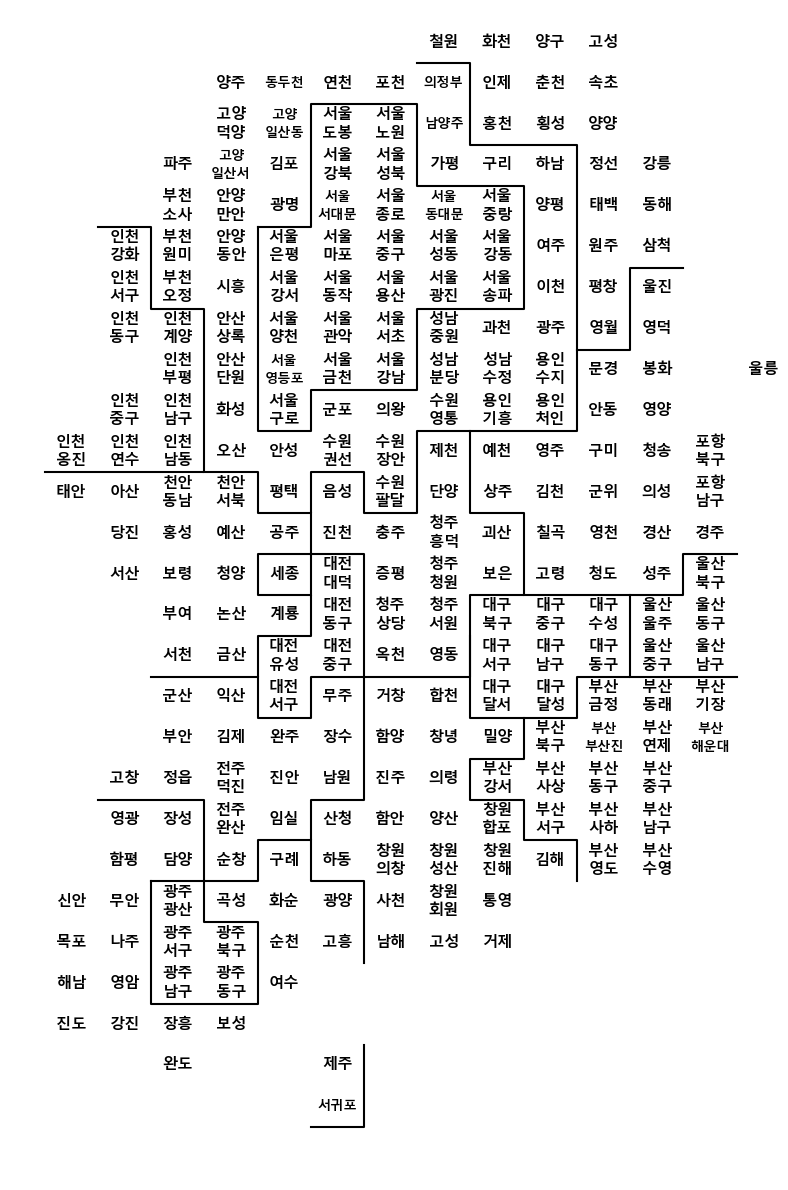

In [19]:
testDraw(draw_korea)

### 그림을 그리이위해 데이터를 계산하는 함수
- 색상을 만들 때, 최솟값은 흰색으로
- blockedMap : 인구현황(pop) 데이터
- targetData : 그리고 싶은 컬럼

In [53]:
def get_data_info(targetData, blockedMap):
    whitelabelmin = (
        max(blockedMap[targetData]) - min(blockedMap[targetData])
    ) * 0.25 + min(blockedMap[targetData])
    
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    
    mapdata = blockedMap.pivot_table(index="y",columns="x", values=targetData)
    
    return mapdata, vmax, vmin, whitelabelmin

In [54]:
def get_data_info_for_zero_center(targetData, blockedMap):
    whitelabelmin = 5
    
    tmp_max = max(
        [np.abs(min(blockedMap[targetData])), np.abs(max(blockedMap[targetData]))]
    )
    
    vmin = -tmp_max
    vmax = tmp_max
    
    mapdata = blockedMap.pivot_table(index="y",columns="x", values=targetData)
    
    return mapdata, vmax, vmin, whitelabelmin

In [55]:
## 고양 일산동 => 고양
##               일산동

## 지역이름을 아래로 내리는 작업

def plot_text(targetData, blockedMap, whitelabelmin):
    
    for idx, row in blockedMap.iterrows():
        
        # 지역 ID를 나눴을 때 두개가 될때 => ex) 서울 서초
        if len(row["ID"].split()) == 2:
            
            # 서울 서초를 서울 + 한칸내리고 + 서초
            dispname = "{}\n{}".format(row["ID"].split()[0], row["ID"].split()[1])
        
        # 고성인경우는 고성
        elif row["ID"][:2] == "고성":
            dispname = "고성"
        
        # 나머지는 그대로
        else:
            dispname = row["ID"]
            
        
        # 글자수에따라 간격 설정
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        
        else:
            fontsize, linespacing = 11, 1.2
            
        
        annocolor = "white" if np.abs(row[targetData]) > whitelabelmin else "black"
        
        plt.annotate(
            dispname,
            (row["x"]+0.5, row["y"]+0.5),
            weight = "bold",
            fontsize = fontsize,
            linespacing = linespacing,
            ha = "center", # 수평기준 가운데 정렬
            va = "center" # 수직기준 가운데 정렬
        )

In [60]:
def drawkorea(targetData, blockedMap, cmapname, zeroCenter=False):
    
    if zeroCenter:
        masked_mapdata, vmax, vmin, whitelabelmin = get_data_info_for_zero_center(targetData, blockedMap)
    
    if not zeroCenter:
        masked_mapdata, vmax, vmin, whitelabelmin = get_data_info(targetData, blockedMap)
    
    plt.figure(figsize=(8,12))
    plt.pcolor(masked_mapdata, vmin=vmin,vmax=vmax, cmap=cmapname, edgecolor="#aaaaaa", linewidth=0.5)
    plot_text(targetData, blockedMap, whitelabelmin)
    
    for path in BORDER_LINES:
        ys, xs = zip(*path) # x좌표끼리 모아주고, y좌표끼리 모아라
        plt.plot(xs,ys, c="black", lw=1.5)
        
    plt.gca().invert_yaxis() # y축 뒤집기. 엑셀에서 y축이 내려갈수록 양수라서
    plt.axis("off") # 모든 축과 라벨, 눈금등이 다 지워지고 오롯이 그래프만 출력
    plt.tight_layout() # 여백을 조정하는 역할을 한다.
    cb = plt.colorbar(shrink=0.1, aspect=10)
    cb.set_label(targetData)
    plt.show()

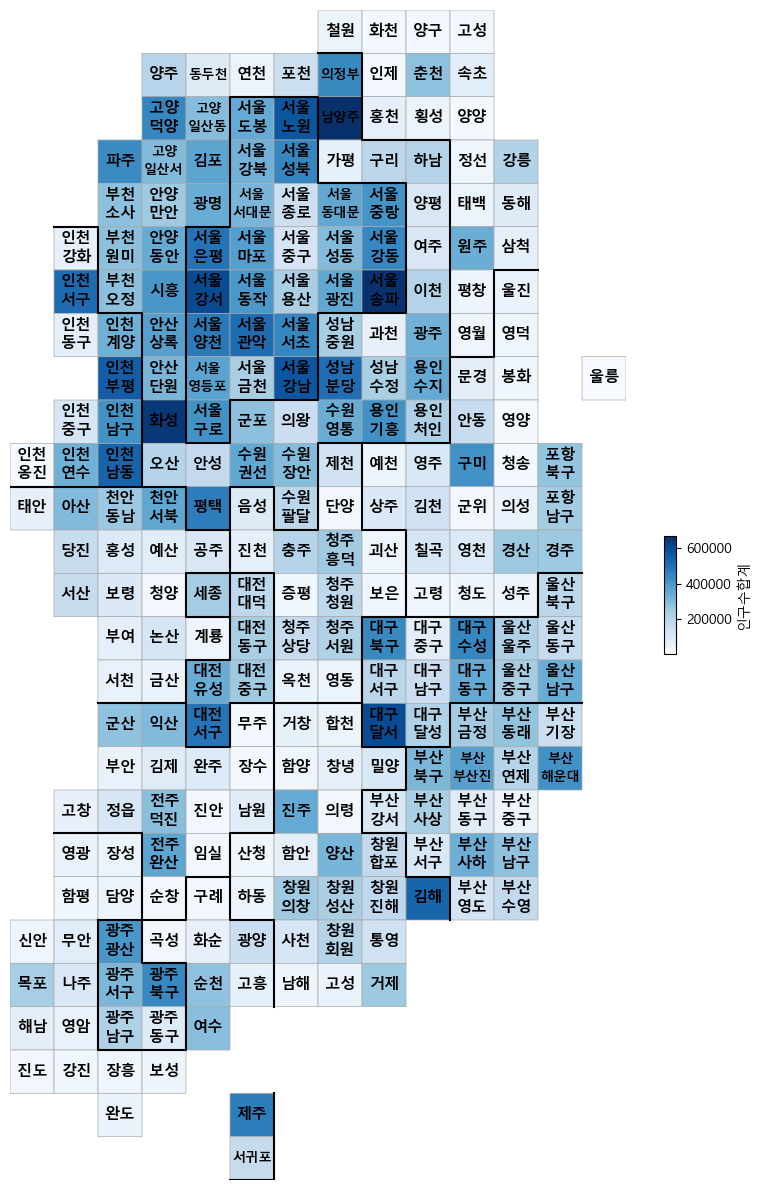

In [61]:
drawkorea("인구수합계", pop, "Blues")

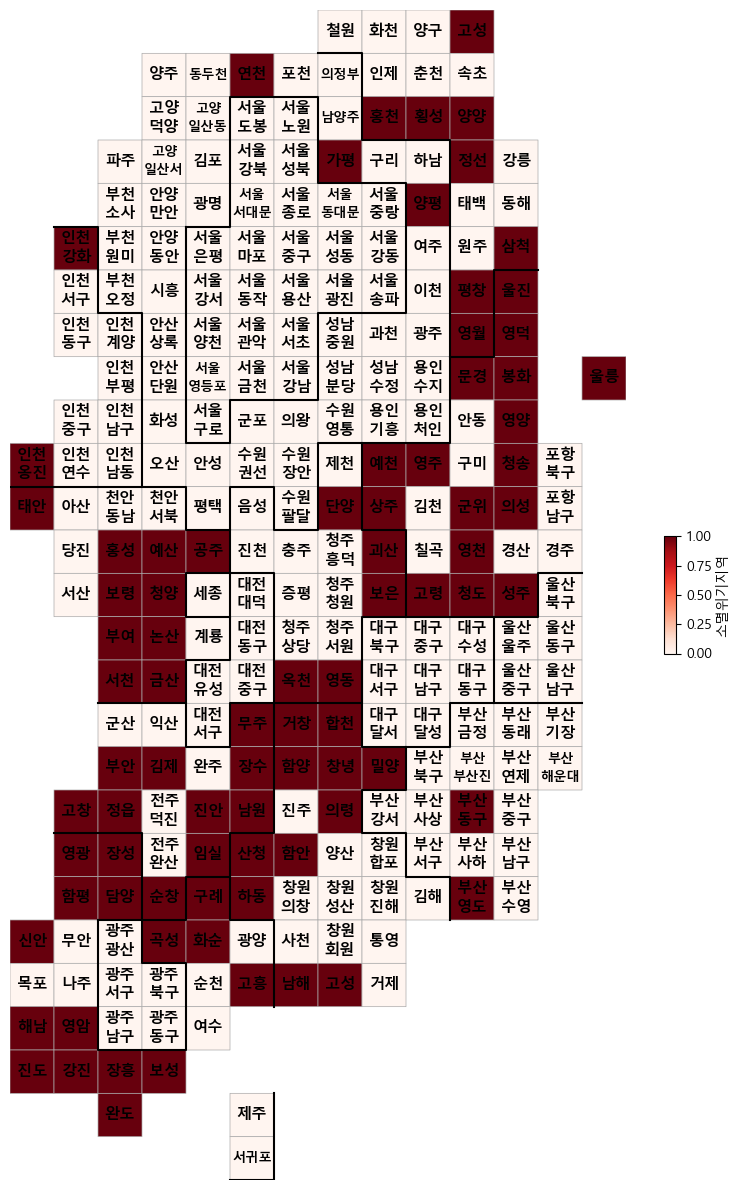

In [62]:
pop["소멸위기지역"] = [ 1 if con else 0 for con in pop["소멸위기지역"]]
drawkorea("소멸위기지역",pop, "Reds")

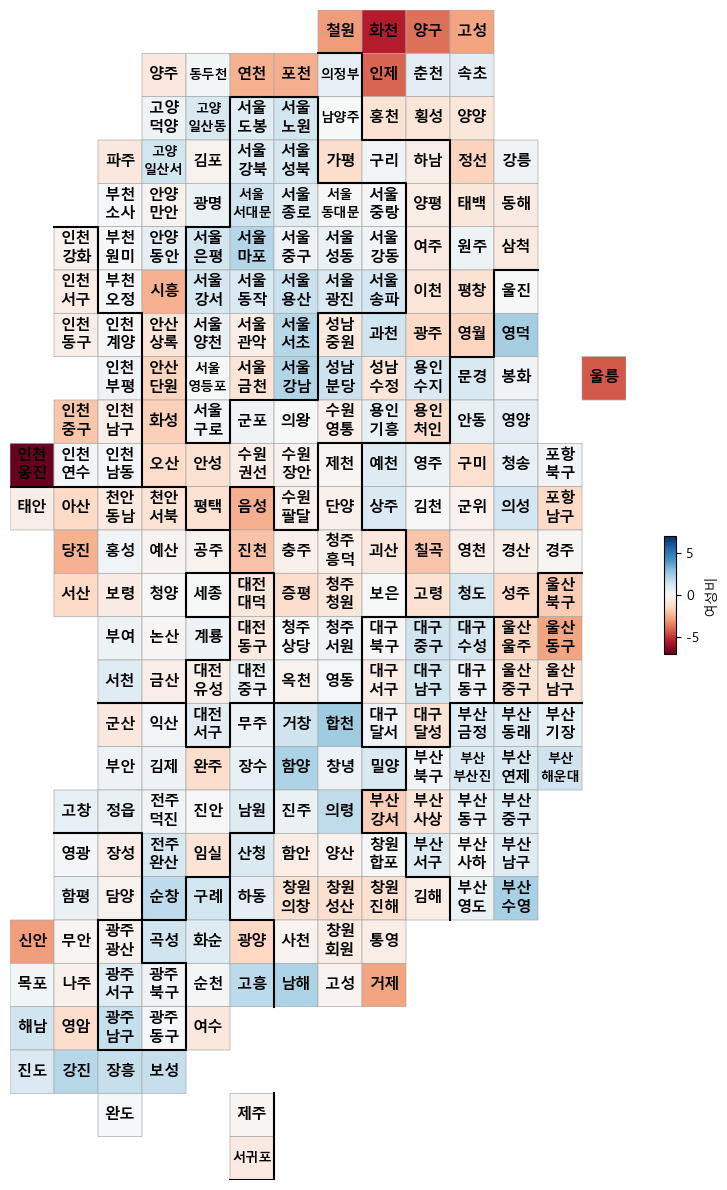

In [67]:
pop["여성비"] = (pop["인구수여자"] / pop["인구수합계"] - 0.5) * 100
drawkorea("여성비", pop, "RdBu", zeroCenter=True)

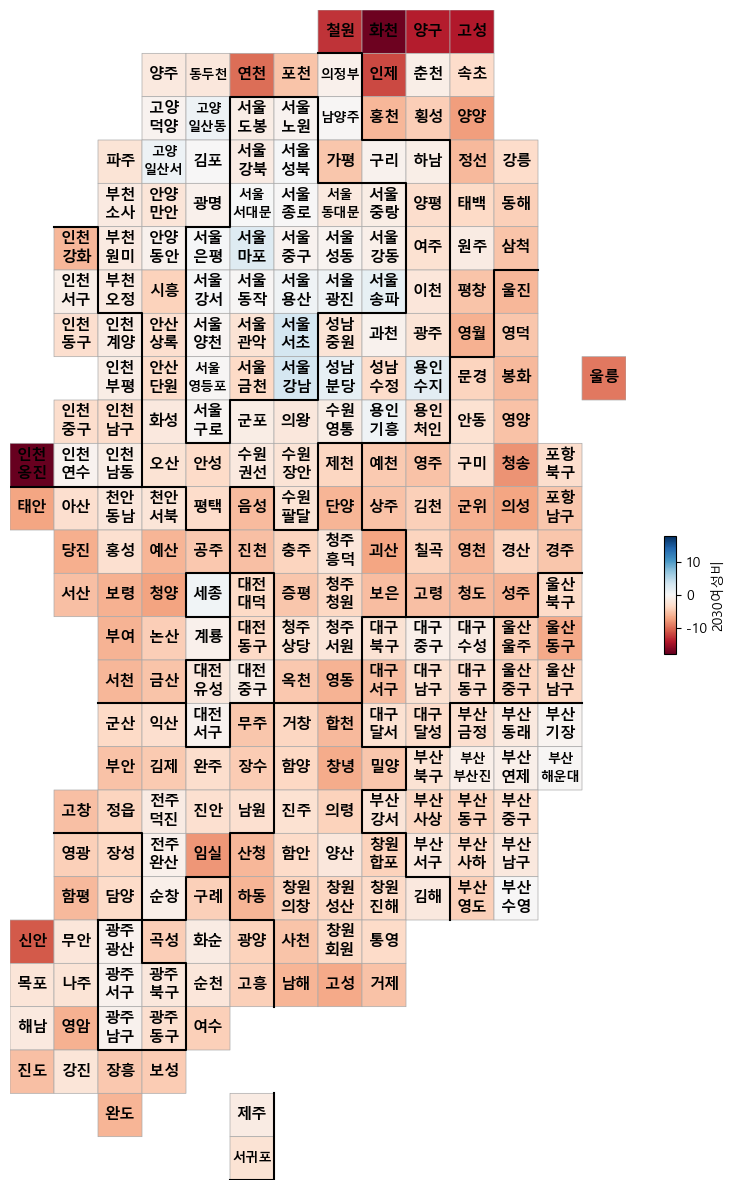

In [68]:
pop["2030여성비"] = (pop["20-39세여자"] / pop["20-39세합계"] - 0.5) * 100
drawkorea("2030여성비", pop, "RdBu", zeroCenter=True)

## folium 시각화

In [69]:
import folium
import json

pop_folium = pop.set_index("ID")
pop_folium.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,3,11,0.323597,-3.227766
고성(강원),강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,0,10,-2.796042,-13.989748
동해,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,4,11,-0.554680,-4.133747
삼척,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,5,11,-0.651590,-5.033812
속초,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,1,10,0.743951,-3.217875


In [81]:
geo_path = "../data/07/07_skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

# 인구수 합계 시각화

mymap = folium.Map(location=[36.2002, 127.054], zoom_start=6)
mymap.choropleth(
    geo_data=geo_str,
    data=pop_folium["인구수합계"],
    columns=[pop_folium.index, pop_folium["인구수합계"]],
    key_on="feature.id",
    fill_color="YlGnBu"
)

mymap

In [82]:
# 소멸위기지역 시각화

mymap2 = folium.Map(location=[36.2002, 127.054], zoom_start=6)
mymap2.choropleth(
    geo_data=geo_str,
    data=pop_folium["소멸위기지역"],
    columns=[pop_folium.index, pop_folium["소멸위기지역"]],
    key_on="feature.id",
    fill_color="PuRd"
)

mymap2

In [83]:
### 데이터 저장 하자

draw_korea.to_csv(
    "../data/07/07_draw_korea_self.csv",encoding="utf-8", sep=","
)